# Analyzing Stock Market Trends Based on News Headlines Using Sentiment Analysis


To explore whether the Sentiment can be used to predict or explain daily movements in the S&P 500 stock market index.

Step 1-5: 

You used yfinance to download historical data for the S&P 500 (^GSPC) from 2018–2023.

Key columns used:

Open, High, Low, Close, Volume

calculated the daily percentage change.

Step 6-8: 

You used a dataset of Top 25 News Headlines and computed a Sentiment Score per day.

Scores range from -1 (very negative) to +1 (very positive) using sentiment analysis (likely with VADER or TextBlob).

Multiple headlines per day were aggregated using the average sentiment.

Step 9: 

Merged the daily sentiment scores with the S&P 500 daily percentage changes using the date as the key. 
The merged dataset had:

Date

Market open/high/low/close/volume

Daily percentage change

Daily average sentiment score

In [ ]:
# Step 9: Load the Updated News CSV with Sentiment Score
import pandas as pd

# Load the news file with sentiment scores already computed
news_df = pd.read_csv("Merged_With_Sentiment.csv")

# Convert Date to datetime
news_df["Date"] = pd.to_datetime(news_df["Date"])

In [2]:
# Step 10 Aggregate by Date (if needed)
# Average sentiment score per date
daily_sentiment = news_df.groupby("Date")["Sentiment_Score"].mean().reset_index()


In [4]:
# step 11: Merge with Your Cleaned Stock Market Data
sp500 = pd.read_csv("sp500_cleaned_2018_2023.csv")
sp500["Date"] = pd.to_datetime(sp500["Date"])

# Merge on Date
merged_df = pd.merge(sp500, daily_sentiment, on="Date", how="inner")

# Preview
print(merged_df.head())


        Date   Open_^GSPC   High_^GSPC    Low_^GSPC  Close_^GSPC  \
0 2018-05-01  2642.959961  2655.270020  2625.409912  2654.800049   
1 2018-05-02  2654.239990  2660.870117  2631.699951  2635.669922   
2 2018-05-03  2628.080078  2637.139893  2594.620117  2629.729980   
3 2018-05-04  2621.449951  2670.929932  2615.320068  2663.419922   
4 2018-05-07  2680.340088  2683.350098  2664.699951  2672.629883   

   Volume_^GSPC  Pct_Change  Sentiment_Score  
0    3562820000    0.254905           0.6800  
1    4047020000   -0.720586          -0.6393  
2    3867530000   -0.225367          -0.8661  
3    3335260000    1.281118           0.9857  
4    3266810000    0.345795          -0.4497  


Step 12: 
Plotted a scatterplot and calculated the Pearson correlation coefficient to see if there was a relationship between:

X-axis: Daily Sentiment Score

Y-axis: S&P 500 % Change

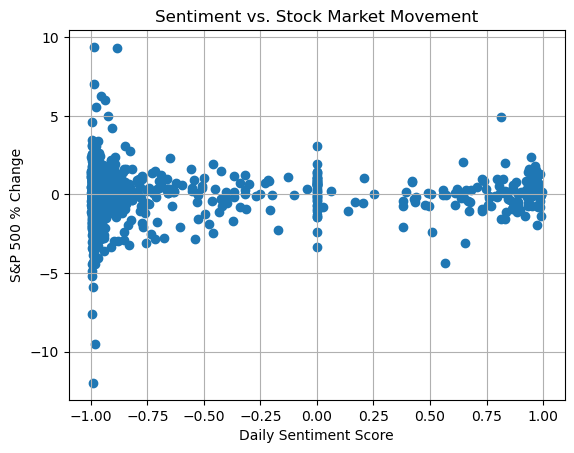

Correlation: 0.004188238156228204


In [11]:
# Step 12: Analyze the Relationship
import matplotlib.pyplot as plt

plt.scatter(merged_df["Sentiment_Score"], merged_df["Pct_Change"])
plt.xlabel("Daily Sentiment Score")
plt.ylabel("S&P 500 % Change")
plt.title("Sentiment vs. Stock Market Movement")
plt.grid(True)
plt.show()

# Correlation
correlation = merged_df["Sentiment_Score"].corr(merged_df["Pct_Change"])
print("Correlation:", correlation)


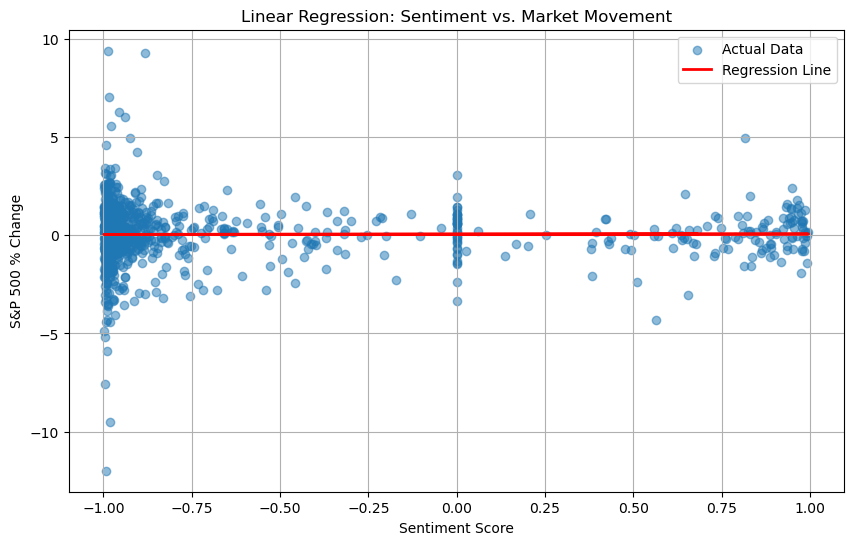

Regression Coefficient (Slope): 0.0104
Intercept: 0.0486
R² Score: 0.0000


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare X (sentiment) and y (% change)
X = merged_df[["Sentiment_Score"]].values
y = merged_df["Pct_Change"].values

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Actual Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Sentiment Score")
plt.ylabel("S&P 500 % Change")
plt.title("Linear Regression: Sentiment vs. Market Movement")
plt.legend()
plt.grid(True)
plt.show()

# Print the slope and intercept
print(f"Regression Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R² Score: {model.score(X, y):.4f}")


Interpretation of Results
Slope: Indicates how much the % change moves per unit sentiment. Positive slope = more positive sentiment = higher returns.

Intercept: The expected % change when sentiment is 0.

R² Score: Tells how well sentiment predicts stock movement (closer to 1 = better fit, closer to 0 = weak linear relationship).

